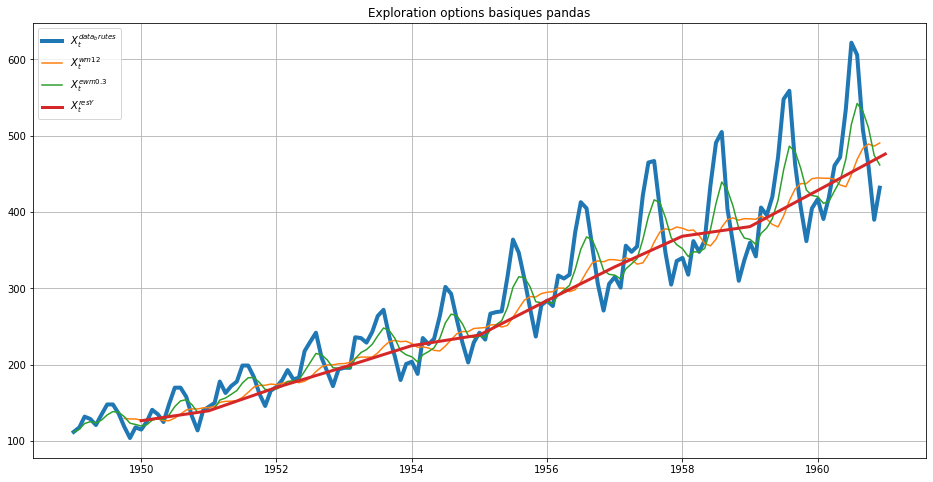

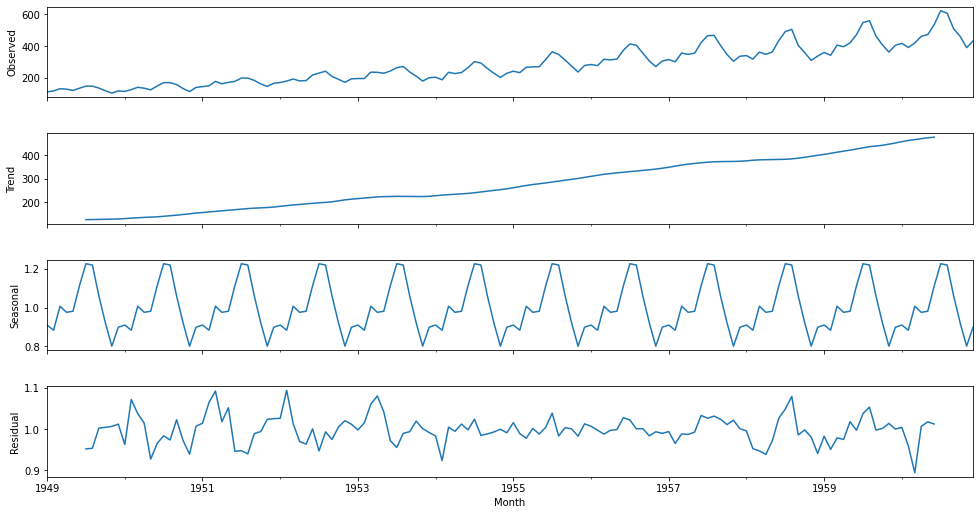

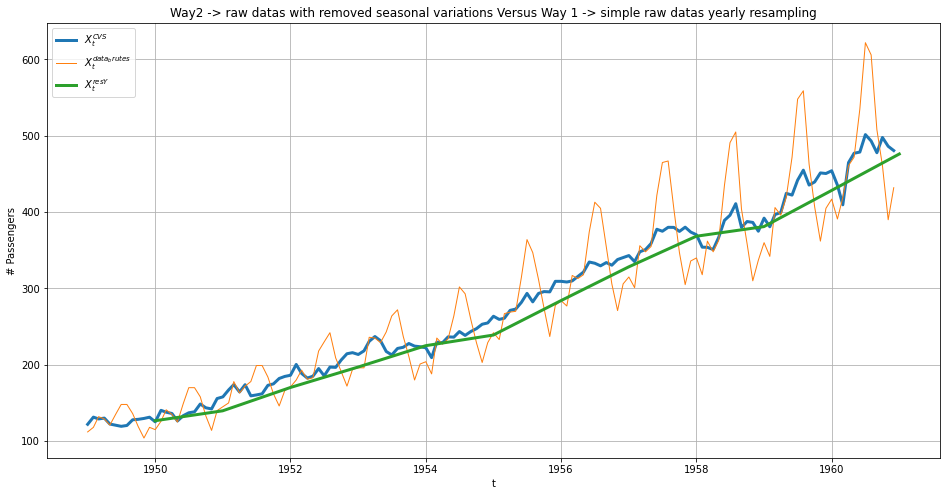

In [67]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import statsmodels.regression.linear_model as linmod

# way 1 -> iso datas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21_SERIES TEMPORELLES /AirPassengers.csv')
# way 2
airpass = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21_SERIES TEMPORELLES /AirPassengers.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# way 1
df['Month']=pd.to_datetime(df['Month'])
indexedairpass = df.set_index(['Month'])
rollairpass= indexedairpass.rolling(window=12).mean()
rollairpass_bis= indexedairpass.rolling(window=10).mean()
rollairpass_ter= indexedairpass.ewm(alpha=0.3).mean()
rollairpass_quart= indexedairpass.resample('Q').mean()
rollairpass_pent = indexedairpass.resample('Y').mean()

plt.figure(figsize=(16,8))
plt.title('Exploration options basiques pandas')
plt.plot(indexedairpass,label = '$X_t^{data_brutes}$', lw=4)
plt.plot(rollairpass_bis,label = '$X_t^{wm12}$')
plt.plot(rollairpass_ter,label = '$X_t^{ewm0.3}$')
plt.plot(rollairpass_pent,label = '$X_t^{resY}$', lw =3)
plt.grid(True)
plt.legend()
plt.show();

# way 2 -> identification type of model (herafter its is multiplicative)
res = seasonal_decompose(airpass, model = 'multiplicative')
fig = res.plot()
fig.set_size_inches(15,8)
plt.show()

# Bring back to additive behaviour
airpasslog = np.log(airpass)

# Definition of temporal basis in months 
t = np.arange(1,145)

#Definition of seasonal base
mth = np.zeros((144,12))
for i in range(12):
    for j in range(12):
        mth[i+12*j][i] = 1

# features definition
features = np.concatenate((t.reshape(144,1), mois),axis=1)

# Linear Regression
lm = linmod.OLS(airpasslog, features)
lm_fitted = lm.fit()

# season_var is containing monthly seasonal variation 
coefs = lm_fitted.params[1:]
season_var = coefs - np.mean(coefs)

season_correction = np.zeros(144)
for i in range(12):
    season_correction += mois[:,i] * season_var[i]
airpasslog_cvs = airpasslog - season_correction
airpass_cvs = np.exp(airpasslog_cvs)

# way 2 versus way 1
plt.figure(figsize=(16,8))
plt.plot(airpass_cvs, label = '$X_t^{CVS}$',lw =3)
plt.plot(indexedairpass,label = '$X_t^{data_brutes}$', lw=1)
plt.plot(rollairpass_pent,label = '$X_t^{resY}$', lw =3)
plt.title('Way2 -> raw datas with removed seasonal variations Versus Way 1 -> simple raw datas yearly resampling')
plt.xlabel('t')
plt.ylabel('# Passengers')
plt.grid(True)
plt.legend();